In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
datapath = "/content/drive/MyDrive/Bài tập AIL302m/data.xlsx"

In [ ]:
data = pd.read_excel(datapath)

In [ ]:
data.head()

,Điện thoại,Màn hình (inch),Camera Chính (MP),Camera Selfie (MP),RAM (GB),Bộ nhớ trong (GB),Tốc độ CPU (gHz),Số nhân GPU,Dung lượng pin (mAh),Số khe sim,Giá tiền (VND)
0,iPhone 12 Pro Max 128GB,6.7,12.0,12.0,6.0,128.0,3.10,4.0,3687,2,30999000
1,OPPO Reno6 Z 5G,6.4,64.0,32.0,8.0,128.0,2.13,3.0,4310,2,9490000
2,iPhone 11 64GB,6.1,12.0,12.0,4.0,64.0,2.65,4.0,3110,2,15999000
3,Xiaomi POCO X3 Pro NFC 8GB-256GB,6.6,48.0,20.0,8.0,256.0,2.96,2.0,5160,2,7290000
4,Nokia C30 3GB-32GB,6.8,13.0,5.0,3.0,32.0,1.60,2.0,6000,2,2790000


In [ ]:
data.shape

(283, 11)

In [ ]:
data.dtypes

Điện thoại               object
Màn hình (inch)         float64
Camera Chính (MP)       float64
Camera Selfie (MP)      float64
RAM (GB)                float64
Bộ nhớ trong (GB)       float64
Tốc độ CPU (gHz)        float64
Số nhân GPU             float64
Dung lượng pin (mAh)      int64
Số khe sim                int64
Giá tiền (VND)            int64
dtype: object

In [ ]:
data.isnull().sum()

Điện thoại               0
Màn hình (inch)          0
Camera Chính (MP)        2
Camera Selfie (MP)      13
RAM (GB)                 0
Bộ nhớ trong (GB)        0
Tốc độ CPU (gHz)         0
Số nhân GPU             14
Dung lượng pin (mAh)     0
Số khe sim               0
Giá tiền (VND)           0
dtype: int64

In [ ]:
data = data.fillna(0)
data.isnull().sum()

Điện thoại              0
Màn hình (inch)         0
Camera Chính (MP)       0
Camera Selfie (MP)      0
RAM (GB)                0
Bộ nhớ trong (GB)       0
Tốc độ CPU (gHz)        0
Số nhân GPU             0
Dung lượng pin (mAh)    0
Số khe sim              0
Giá tiền (VND)          0
dtype: int64

In [ ]:
data = data.drop(['Điện thoại'], axis = 1)
data.head()

,Màn hình (inch),Camera Chính (MP),Camera Selfie (MP),RAM (GB),Bộ nhớ trong (GB),Tốc độ CPU (gHz),Số nhân GPU,Dung lượng pin (mAh),Số khe sim,Giá tiền (VND)
0,6.7,12.0,12.0,6.0,128.0,3.10,4.0,3687,2,30999000
1,6.4,64.0,32.0,8.0,128.0,2.13,3.0,4310,2,9490000
2,6.1,12.0,12.0,4.0,64.0,2.65,4.0,3110,2,15999000
3,6.6,48.0,20.0,8.0,256.0,2.96,2.0,5160,2,7290000
4,6.8,13.0,5.0,3.0,32.0,1.60,2.0,6000,2,2790000


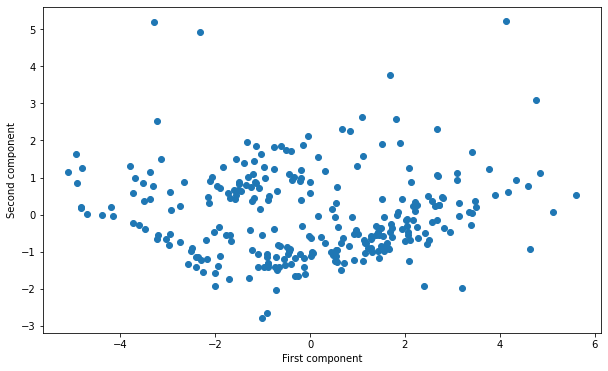

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(StandardScaler().fit_transform(data))

plt.figure(figsize=(10,6))
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()


In [ ]:
X = data_pca

In [ ]:
def kmeans_init_centers(X, n_cluster):
  # random k index beetween 0 and shape(X) without duplicate index.
  # Then return X[index] as cluster
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [ ]:
# Hàm này dùng để vẽ dữ liệu lên đồ thị
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
 
  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i))
  plt.legend()
  plt.show()


In [ ]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

In [ ]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers


In [ ]:
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))


In [ ]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[-0.31783827 -1.65270446]
 [-1.27475336 -0.42021048]
 [-0.7590666   1.2263862 ]]


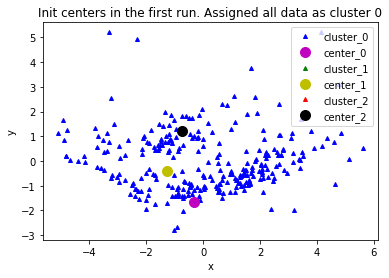

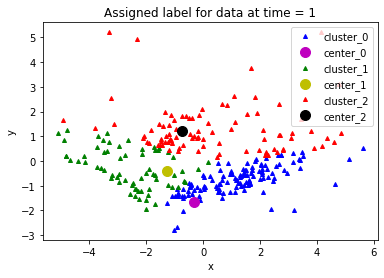

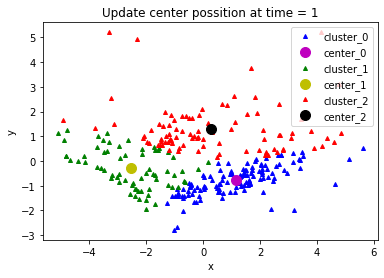

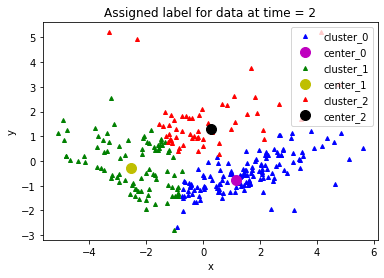

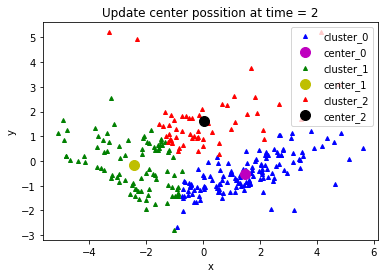

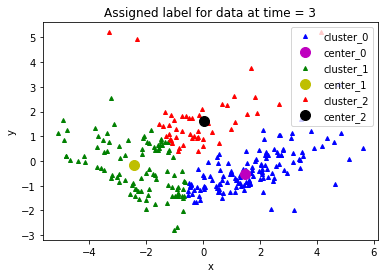

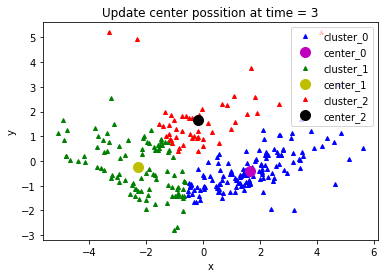

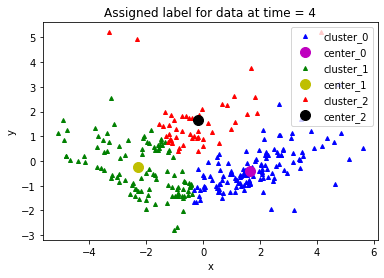

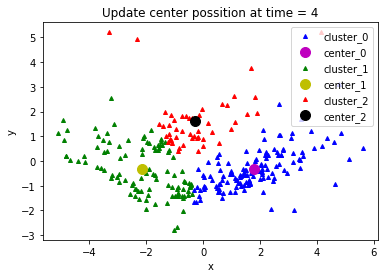

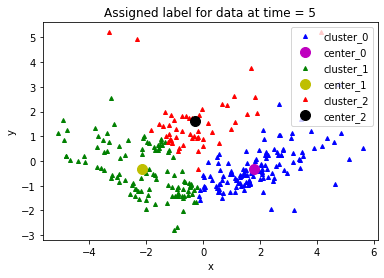

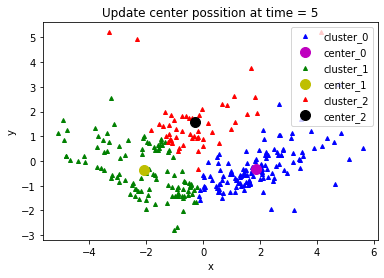

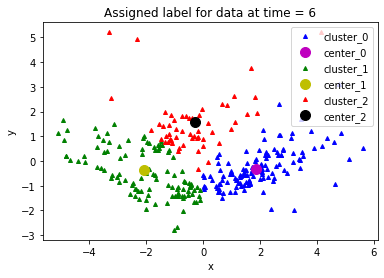

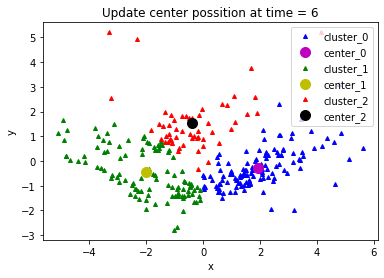

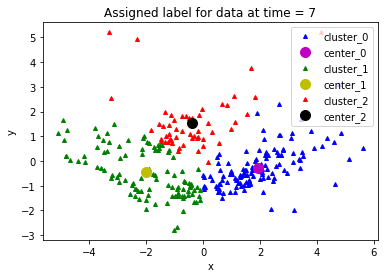

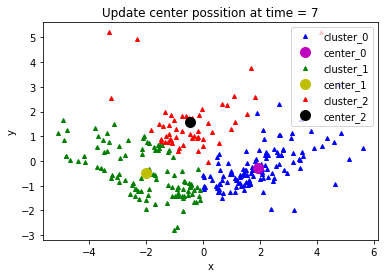

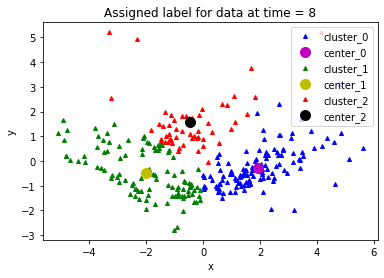

Done! Kmeans has converged after 7 times


In [ ]:
n_cluster = 3
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers)
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')

In [ ]:
labels

array([2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
data_lable = pd.read_excel(datapath)
lables_dataFrame = pd.DataFrame(labels, columns=['Class'])
data_final = pd.concat([data_lable,lables_dataFrame], axis=1)
pd.set_option("display.max_rows", None, "display.max_columns", None)
data_final

,Điện thoại,Màn hình (inch),Camera Chính (MP),Camera Selfie (MP),RAM (GB),Bộ nhớ trong (GB),Tốc độ CPU (gHz),Số nhân GPU,Dung lượng pin (mAh),Số khe sim,Giá tiền (VND),Class
0,iPhone 12 Pro Max 128GB,6.70,12.00,12.0,6.000,128.000,3.10,4.0,3687,2,30999000,2
1,OPPO Reno6 Z 5G,6.40,64.00,32.0,8.000,128.000,2.13,3.0,4310,2,9490000,0
2,iPhone 11 64GB,6.10,12.00,12.0,4.000,64.000,2.65,4.0,3110,2,15999000,2
3,Xiaomi POCO X3 Pro NFC 8GB-256GB,6.60,48.00,20.0,8.000,256.000,2.96,2.0,5160,2,7290000,0
4,Nokia C30 3GB-32GB,6.80,13.00,5.0,3.000,32.000,1.60,2.0,6000,2,2790000,1
5,Xiaomi Redmi 10 4GB-128GB,6.50,50.00,8.0,4.000,128.000,2.00,4.0,5000,2,4290000,0
6,Samsung Galaxy Note 20 Ultra,6.90,108.00,10.0,8.000,256.000,2.73,11.0,4500,2,19999000,0
7,iPhone 12 64GB,6.10,12.00,12.0,4.000,64.000,3.10,4.0,2815,2,19999000,2
8,Vsmart Aris 8GB-128GB,6.30,64.00,20.0,8.000,128.000,2.20,2.0,4000,2,5899000,0
9,Samsung Galaxy A22 5G,6.60,48.00,8.0,6.000,128.000,2.20,2.0,5000,2,12499000,0
